<a href="https://colab.research.google.com/github/novilfahlevy/PA-Datmin-C1-4/blob/main/C1_4_PADATMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised

In [ ]:
#Link awal gdrive
link = "https://drive.google.com/file/d/1TVtH_xSKtsb1dXdnyRmDMpuJ9O2RrhZF/view?usp=share_link"

#Setelah Diubah
link_file = "https://drive.google.com/uc?id=1TVtH_xSKtsb1dXdnyRmDMpuJ9O2RrhZF"

In [ ]:
#Import Library yang akan dipakai
import pandas as pd
import seaborn as sns

In [ ]:
#Fungsi ini untuk melihat persentase data terisi dan kosong
def null_ratio(df, limit=-1):
  percent_missing = df.isnull().sum() * 100 / len(df)
  df_result = pd.DataFrame({
      "filled":df.notnull().sum(),
      "N null":df.isna().sum(),
      "null_ratio(%)": percent_missing,
      }
  )
  nr =  df_result.sort_values("null_ratio(%)",ascending=False)
  return nr[nr["null_ratio(%)"] > limit]


##Business Undestanding

Sebuah perusahaan Real Estate tentunya membutuhkan data-data perumahan yang akan dipantau dan diperjual-belikan kepada orang yang memerlukan, tidak hanya itu data data juga harus disimpan dan diolah di tempat yang ebnar agak tidak terjadi redudansi ataupun duplikat Oleh karena itu, perusahaan Real Estate harus memiliki bukti nyata kepemilikan perumahan mereka.



> **Visi**

Mengembangkan sebuah grup bisnis properti dengan semangat yang unggul dan penuh inovasi, sehingga menciptakan nilai tambah dalam menyediakan kehidupan yang lebih baik bagi masyarakat dan memberikan kemakmuran dan kesejahteraan bagi para pemangku kepentingan.



> **Misi**

Menjadi yang terdepan dalam bisnis properti dengan menjadi yang paling unggul, profesional dan menguntungkan, sehingga menjadi pilihan pertama bagi para konsumen, menjadi tempat kerja yang paling menarik dan menantang bagi para karyawan, menjadi investasi yang paling menguntungkan bagi para pemegang saham dan menjadi berkat yang nyata bagi masyarakat dan Tanah Air



> **Target**

Milennial atau orang yang membutuhkan rumah atau properti dengan harga murah dan ukuran yang minimalis untuk keluarga kecil namun fasilitas yang lengkap


> **Alasan menggunakan data mining**

Dengan menggunakan data mining, perusahaan dapat lebih mudah untuk Mengelompokkan dan mengklasifikasikan berbagai jenis rumah, ukuran, properti dan ciri atau target customer yang sesuai dengan marketing real estate


> **Access Situation**


1.   Tools yang digunakan :

*   Google Colab
*   Google Drive
*   Kaggle
*   Google Data Studio

2. Cost Vs Benefit Anlyze

*   Keuntungan
    *  Dapat mengelompokkan dan mengklasifikasikan tipe dan harga rumah dengan mudah sehingga gampang untuk diperjual-belikan
    *  Memudahkan customer untuk memilih tipe rumah dan menentukan sesuai budget yang customer punya
    * Meminimalisir kerugian yang dapat dihasilkan seperti tidak kesesuaian bduget dengan tipe rumah
    * Perusahaan dapat mengelompokkan customer sesuai dengan tipe rumah
*   Kelebihan
    * Perusahaan hanya perlu untuk memperbaharui melalui data set tanpa harus merubah dari tools nya
    * Data yang disimpan akan tetap rapi dan bisa dicari dengan mudah
    * Sudah dilengkapi library yang akan memudahkan perusahaan untuk mengklasifikasi, regresi, klastering dan lain lain agar data yang dihasilkan itu sesuai.



> **Produce Project Plan**

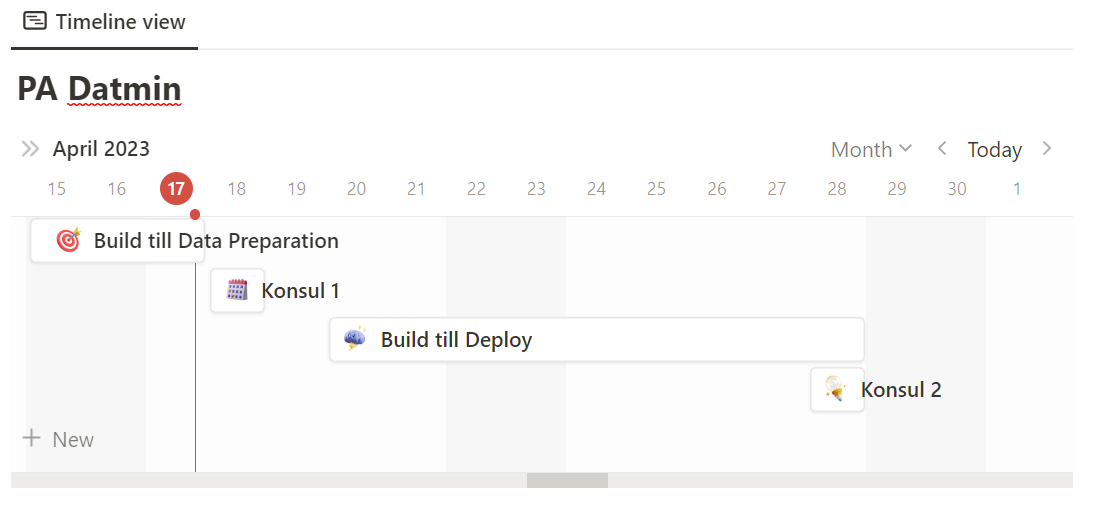




##Data Understanding

In [ ]:
#Collect initial data
df = pd.read_csv(link_file)

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Describe Data :
1. Describe Column
2. Describe data secara keseluruhan


> Attribute Information


1. Price = harga rumah
2. Area = dimana area rumah
3. Bedrooms = jumlah bedrooms pada tiap rumah
4. Bathrooms = jumlah bathrooms pada tiap rumah
5. Stories = jumlah stories pada tiap rumah
6. Mainroad = rumah yang berada di main road dengan penjelasan "yes" or "no"
7. Guestroom = rumah yang memiliki guestroom dengan penjelasan "yes" or "no"
8. Basement = rumah yang memiliki basement dengan penjelasan "yes" or "no"
9. Hotwaterheating = rumah yang memiliki hotwaterheating dengan penjelasan "yes" or "no"
10. Aircondtioning = rumah yang memiliki airconditioning dengan penjelasan "yes" or "no"
11. Parking = jumlah area parking tiap rumah
12. Prefarea 
13. Furnishingstatus = penjelasan tiap rumah apakah "furnished", "semi-furnished", dan "unfurnished"

> Kolom yang menjadi target : Price



In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Terdapat 545 baris dan 13 kolom pada data ini.
df.shape

(545, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Didalam dataset terdapat 227 semi-furnised, 178 unfurnised dan 140 furnised.
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
#Didalam dataset terdapat 373 rumah menggunakan airconditioning dan 172 tidak menggunakan airconditioning
df.airconditioning.value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [ ]:
#Didalam dataset terdapat 25 rumah menggunakan hotwaterheating dan 520 tidak menggunakan hotwaterheating
df.hotwaterheating.value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [ ]:
#Didalam dataset terdapat 191 rumah yang memiliki basement dan 354 tidak memiliki basement
df.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [ ]:
#Didalam dataset terdapat 97 rumah yang memiliki guestroom dan 448 tidak memiliki guestroom
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [ ]:
#Didalam dataset terdapat 468 rumah yang berada di mainroad dan 77 tidak berada di mainroad
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

### Eksplore Data

Pada explore data ini kita akan membuat perbandingan dari setiap atribut atau kolom pada studi kasus Housing 

<Axes: xlabel='airconditioning', ylabel='count'>

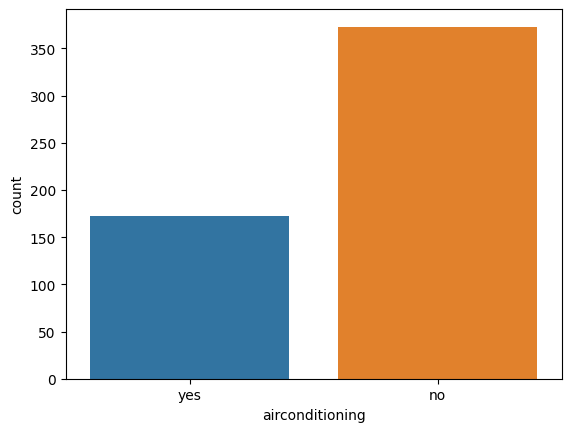

In [ ]:
#@title Perbandingan Rumah Menggunakan airconditioning dan Tidak
sns.countplot(data=df,x="airconditioning")

Ternyata dari data yang ada, rumah yang tidak menggunakan air conditioning lebih banyak.

<Axes: xlabel='mainroad', ylabel='count'>

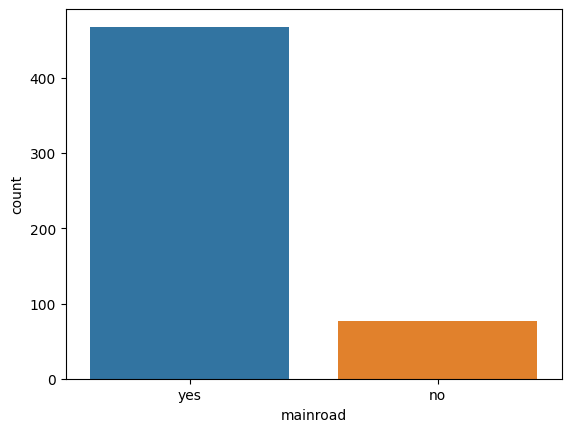

In [ ]:
#@title Perbandingan Rumah yang berada di mainroad dan tidak
sns.countplot(data=df,x="mainroad")

Ternyata rumah yang tidak terletak di mainroad lebih banyak

<Axes: xlabel='bedrooms', ylabel='count'>

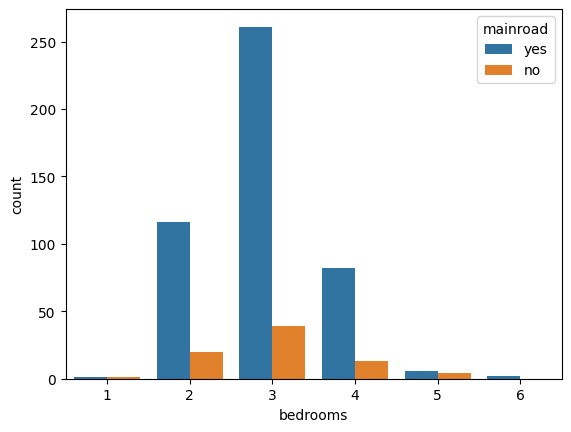

In [ ]:
sns.countplot(data=df,x="bedrooms",hue="mainroad")

Distribution

<Axes: xlabel='area', ylabel='Count'>

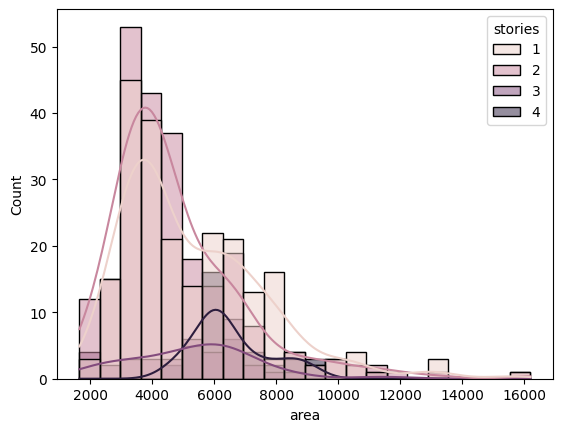

In [ ]:
sns.histplot(data=df,x="area",hue='stories',kde=True)

In [ ]:
import plotly.express as px

<Axes: xlabel='area'>

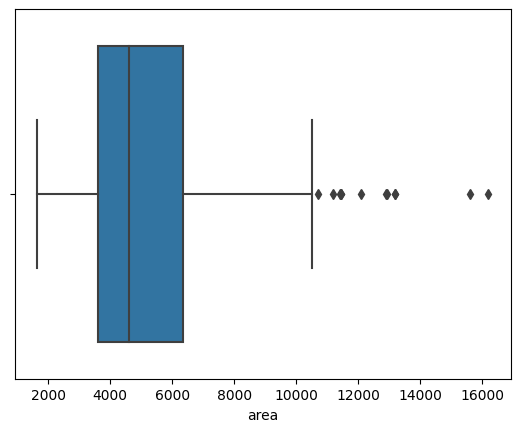

In [ ]:
sns.boxplot(data=df,x="area")

In [ ]:
px.histogram(df,x="area",color='stories')


Rumah yang memiliki lantai 1 lebih banyak terdapat pada area 3500-3999 bt data

## Data Preparation

### Select data 

Adalah bagian menentukan dataset yang akan digunakan apabila terdapat banyak tabel

Data utama yang digunakan bersumber dari tabel Housing.csv 

### Clean Data

1. Datatype
2. Missing value
3. Outlier Handling

In [ ]:
df2 = df.copy(deep=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Merubah Datatype mainroad, guestroom, basement, hotwaterheating, airconditioning, 
# dan prefarea jadi 1,0 karena isi datanya hanya yes dan no

df2.mainroad = df.mainroad.map({"yes":1,"no":0})
df2.guestroom = df.guestroom.map({"yes":1,"no":0})
df2.basement = df.basement.map({"yes":1,"no":0})
df2.hotwaterheating = df.hotwaterheating.map({"yes":1,"no":0})
df2.airconditioning = df.airconditioning.map({"yes":1,"no":0})
df2.prefarea = df.prefarea.map({"yes":1,"no":0})

In [ ]:
# Kategorikan price menjadi 3 tipe
def categorize_price(price):
    if price <= 5000000:
        return 'cheap'
    elif price > 5000000 and price <= 8000000:
        return 'medium'
    else:
        return 'expensive'

df2.insert(loc=1, column='pricecategory', value=df2['price'].apply(categorize_price))

df2.head()

,price,pricecategory,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,expensive,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,expensive,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,expensive,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,expensive,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,expensive,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df2.mainroad.value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [ ]:
df2.guestroom.value_counts()

0    448
1     97
Name: guestroom, dtype: int64

In [ ]:
df2.basement.value_counts()

0    354
1    191
Name: basement, dtype: int64

In [ ]:
df2.hotwaterheating.value_counts()

0    520
1     25
Name: hotwaterheating, dtype: int64

In [ ]:
df2.airconditioning.value_counts()

0    373
1    172
Name: airconditioning, dtype: int64

In [ ]:
df2.prefarea.value_counts()

0    417
1    128
Name: prefarea, dtype: int64

In [ ]:
df2.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   pricecategory     545 non-null    object
 2   area              545 non-null    int64 
 3   bedrooms          545 non-null    int64 
 4   bathrooms         545 non-null    int64 
 5   stories           545 non-null    int64 
 6   mainroad          545 non-null    int64 
 7   guestroom         545 non-null    int64 
 8   basement          545 non-null    int64 
 9   hotwaterheating   545 non-null    int64 
 10  airconditioning   545 non-null    int64 
 11  parking           545 non-null    int64 
 12  prefarea          545 non-null    int64 
 13  furnishingstatus  545 non-null    object
dtypes: int64(12), object(2)
memory usage: 59.7+ KB


In [ ]:
df2

,price,pricecategory,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,expensive,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,expensive,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,expensive,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,expensive,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,expensive,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,cheap,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,cheap,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,cheap,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,cheap,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [ ]:
from numpy import nan

### Missing Value

In [ ]:
df2.isna().sum()

price               0
pricecategory       0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
null_ratio(df2)

,filled,N null,null_ratio(%)
price,545,0,0.0
pricecategory,545,0,0.0
area,545,0,0.0
bedrooms,545,0,0.0
bathrooms,545,0,0.0
stories,545,0,0.0
mainroad,545,0,0.0
guestroom,545,0,0.0
basement,545,0,0.0
hotwaterheating,545,0,0.0


### Outlier

#### Area

In [ ]:
# Outlier
# Batas atas Q3 + 1.5*IQR
# IQR = Q3-Q1

q3 = df2.area.quantile(0.75)
q1 = df2.area.quantile(0.25)
iqr = q3 - q1
ba = q3 + (1.5 * iqr)
bw = q1 - (1.5 * iqr)

print(q3,q1,iqr,ba,bw)

6360.0 3600.0 2760.0 10500.0 -540.0


In [ ]:
outlier = df2[(df2.area > ba) | (df2.area < bw)]
outlier

,price,pricecategory,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,expensive,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
10,9800000,expensive,13200,3,1,2,1,0,1,0,1,2,1,furnished
56,7343000,medium,11440,4,1,2,1,0,1,0,0,1,1,semi-furnished
64,7000000,medium,11175,3,1,1,1,0,1,0,1,1,1,furnished
66,6930000,medium,13200,2,1,1,1,0,1,1,0,1,0,furnished
69,6790000,medium,12090,4,2,2,1,0,0,0,0,2,1,furnished
125,5943000,medium,15600,3,1,1,1,0,0,0,1,2,0,semi-furnished
129,5873000,medium,11460,3,1,3,1,0,0,0,0,2,1,semi-furnished
186,5110000,medium,11410,2,1,2,1,0,0,0,0,0,1,furnished
191,5040000,medium,10700,3,1,2,1,1,1,0,0,0,0,semi-furnished


In [ ]:
len(outlier) / (len(df2) * 100)

0.00022018348623853212

In [ ]:
# Karena ga diatas 5 persen kita bisa hapus data nya
df2 = df2[~((df2.area > ba) | (df2.area < bw))]

<Axes: >

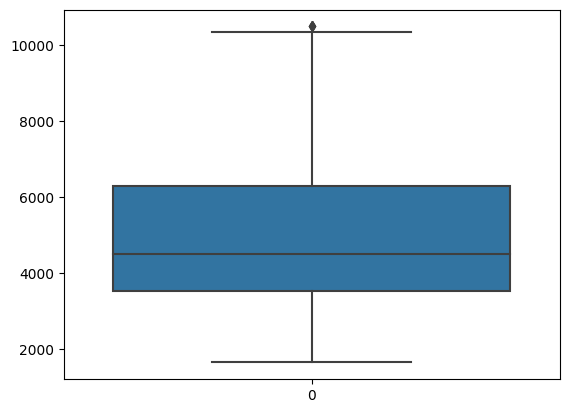

In [ ]:
sns.boxplot(df2.area)

### Construct Data
1. Hapus Kolom yang tidak digunakan
2. Ekstrak kolom-kolom yang ada

In [ ]:
df3 = df2.drop(columns=["price"])
df3.head()

,pricecategory,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,expensive,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,expensive,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,expensive,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,expensive,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,expensive,7420,4,1,2,1,1,1,0,1,2,0,furnished


Disini kolom **price** dihapus karena target data yang digunakan adalah **pricecategory**.

### Integrate data
Proses ini tidak dilakukan karena tidak ada tabel yang perlu di join-kan dengan tabel utama

## Visualisasi Korelasi

In [ ]:
df3.corr()

<ipython-input-45-cf5c64484bf6>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
area,1.000000,0.148307,0.226712,0.119051,0.304678,0.195351,0.051724,-0.030535,0.274750,0.379151,0.237200
bedrooms,0.148307,1.000000,0.362699,0.412939,-0.014761,0.084873,0.103469,0.060854,0.168110,0.140784,0.077781
bathrooms,0.226712,0.362699,1.000000,0.328777,0.043823,0.131347,0.115073,0.074431,0.197589,0.188998,0.071314
stories,0.119051,0.412939,0.328777,1.000000,0.124143,0.041314,-0.173534,0.026930,0.302419,0.047276,0.037664
mainroad,0.304678,-0.014761,0.043823,0.124143,1.000000,0.095388,0.043336,-0.013713,0.107971,0.203403,0.198478
guestroom,0.195351,0.084873,0.131347,0.041314,0.095388,1.000000,0.373862,-0.007598,0.142281,0.046956,0.174623
basement,0.051724,0.103469,0.115073,-0.173534,0.043336,0.373862,1.000000,-0.007123,0.042501,0.053294,0.228852
hotwaterheating,-0.030535,0.060854,0.074431,0.026930,-0.013713,-0.007598,-0.007123,1.000000,-0.128515,0.069166,-0.053698
airconditioning,0.274750,0.168110,0.197589,0.302419,0.107971,0.142281,0.042501,-0.128515,1.000000,0.156199,0.118206
parking,0.379151,0.140784,0.188998,0.047276,0.203403,0.046956,0.053294,0.069166,0.156199,1.000000,0.080368


<ipython-input-46-39c919fe9a67>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

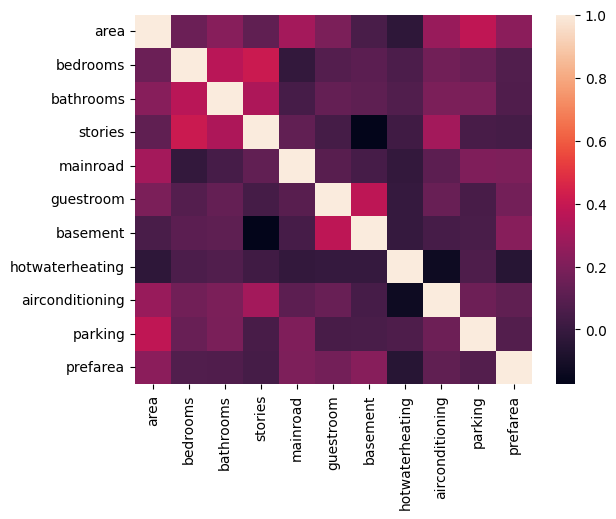

In [ ]:
sns.heatmap(df3.corr())

In [ ]:
px.imshow(df3.corr())

<ipython-input-47-f8bfc716cc33>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# Ada korelasi yang signifikan antara hipertensi dan jantungan

## Format Data / Preprocessing

1. Encoding
2. Train-test split
3. Cross_validation (optional)

In [ ]:
# Kategorikan price menjadi 3 tipe
def convert_pricecategory_to_numeric(pricecategory):
    if pricecategory == 'cheap':
        return 1
    elif pricecategory == 'medium':
        return 2
    else:
        return 3

df3['pricecategory'] = df3['pricecategory'].apply(convert_pricecategory_to_numeric)

df3.head()

,pricecategory,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,3,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,3,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,3,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df4 = pd.get_dummies(df3, columns=['furnishingstatus'])
df4

,pricecategory,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,3,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,3,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,3,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,3,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# membuat variabel untuk train split test
TARGET = df4['pricecategory']
data = df4.drop(columns='pricecategory')

Selanjutnya adalah membuat visualisasi Train Test Split dengan tujuannya membagi data untuk evaluasi performa data yang digunakan

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(data, TARGET, test_size=0.33, random_state=42)

print('Training dataset:')
print(X_train.shape)
print(y_train.shape)
print()
print('Test dataset:')
print(X_test.shape)
print(y_test.shape)

Training dataset:
(357, 14)
(357,)

Test dataset:
(176, 14)
(176,)


## Modelling & Evaluation

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

<img src ="https://www.researchgate.net/publication/346129022/figure/fig3/AS:961239823970323@1606188841513/Visualizing-accuracy-recall-aka-sensitivity-and-precision-which-are-the-common.ppm">

In [ ]:
# Import fungsi untuk evaluasi
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import math

### Naive Baiyes

In [ ]:
# Import fungsi untuk membuat model Naive Baiyes
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Panggil klasifikasi Naive Baiyes (membuat modelnya)
modelnb = GaussianNB()

In [ ]:
# Training modelnya menggunakan X_train dan y_train
nbtrain = modelnb.fit(X_train, y_train)

In [ ]:
# Prediksi menggunakan X_test
nb_pred = nbtrain.predict(X_test)
nb_pred

array([3, 1, 2, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 3, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 3, 2, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 1, 3, 1, 3, 1,
       2, 2, 1, 1, 1, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       3, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1])

#### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, nb_pred, labels=modelnb.classes_)

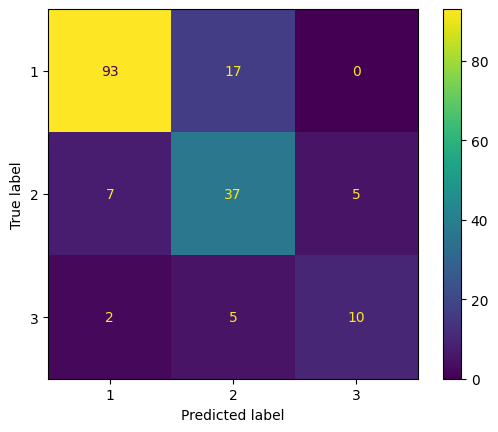

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelnb.classes_)
disp.plot()

In [ ]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

#### Precision

In [ ]:
precision = TP / (TP + FP)
print(precision * 100)

68.51851851851852


#### Recall

In [ ]:
recall = TP / (TP + FN)
print(recall * 100)

84.0909090909091


#### F1

In [ ]:
f1 = (2 * precision * recall) / (precision + recall)
print(f1 * 100)

75.51020408163266


#### Accuracy

In [ ]:
accuracy = (TP + TN) / (TP + FN + TN + FP)
print(accuracy * 100)

84.4155844155844


#### Specificity

In [ ]:
specificity = TN / (TN + FP)
print(specificity * 100)

84.54545454545455


### KNN

In [ ]:
#@title Algoritma
# Mendefinisikan fungsi untuk hitung jarak euclidean antara 2 data/titik
def euclidean_distance(X_test_instance, X_train_instance):
  distance = 0
  for x in range(len(X_train_instance)):
    distance += pow((X_test_instance[x] - X_train_instance[x]), 2)
  return math.sqrt(distance)

# Mendefinisikan function untuk dapat nilai dari KNN 
def get_neighbors(X_train, y_train, X_test_instance, k):
  distances = []
  for i in range(len(X_train)):
    distance = euclidean_distance(X_test_instance, X_train.iloc[i])
    distances.append((i, distance))
  distances.sort(key=lambda x: x[1])
  neighbors = []
  for i in range(k):
    neighbors.append((y_train.iloc[distances[i][0]], distances[i][1]))
  return neighbors

# Mendefinisikan function untuk buat prediksi 
def prediksi(X_train, y_train, X_test_instance, k):
  neighbors = get_neighbors(X_train, y_train, X_test_instance, k)
  classes = {}
  for i in range(len(neighbors)):
      response = neighbors[i][0]
      if response in classes:
          classes[response] += 1
      else:
          classes[response] = 1
  sorted_classes = sorted(classes.items(), key=lambda x: x[1], reverse=True)
  return sorted_classes[0][0]

# Mendefinisikan function untuk buat presikdi dalam testing data
def k_nearest_neighbors(X_train, y_train, X_test, k):
  predictions = []
  for i in range(len(X_test)):
      predictions.append(prediksi(X_train, y_train, X_test.iloc[i], k))
  return predictions

In [ ]:
# Algoritma dengan k=5
predictions = k_nearest_neighbors(X_train, y_train, X_test, k=5)

#### Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, predictions)

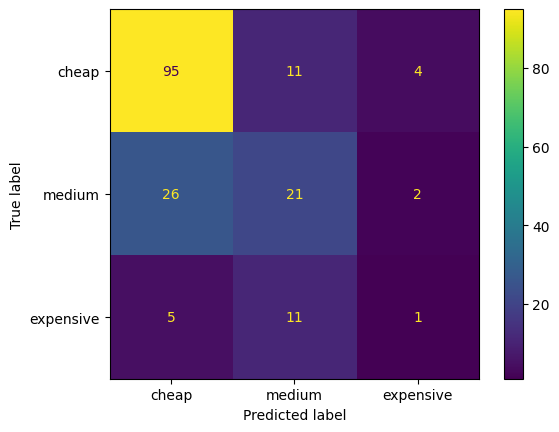

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cheap', 'medium', 'expensive'])
disp.plot()

In [ ]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

#### Precision

In [ ]:
precision = TP / (TP + FP)
print(precision * 100)

65.625


#### Recall

In [ ]:
recall = TP / (TP + FN)
print(recall * 100)

44.680851063829785


#### F1

In [ ]:
f1 = (2 * precision * recall) / (precision + recall)
print(f1 * 100)

53.16455696202532


#### Accuracy

In [ ]:
accuracy = (TP + TN) / (TP + FN + TN + FP)
print(accuracy * 100)

75.81699346405229


#### Specificity

In [ ]:
specificity = TN / (TN + FP)
print(specificity * 100)

89.62264150943396


### C45

In [ ]:
#@title Algoritma
class Node:
    def __init__(self):

        # links to the left and right child nodes
        self.right = None
        self.left = None

        # derived from splitting criteria
        self.column = None
        self.threshold = None

        # probability for object inside the Node to belong for each of the given classes
        self.probas = None
        # depth of the given node
        self.depth = None

        # if it is the root Node or not
        self.is_terminal = False


class DecisionTreeClassifier:
    def __init__(self, max_depth=3, min_samples_leaf=1, min_samples_split=2):

        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split

        self.classes = None

        # Decision tree itself
        self.Tree = None

    def nodeProbas(self, y):
        """
        Calculates probability of class in a given node
        """

        probas = []

        # for each unique label calculate the probability for it
        for one_class in self.classes:
            proba = y[y == one_class].shape[0] / y.shape[0]
            probas.append(proba)
        return np.asarray(probas)

    def gini(self, probas):
        """
        Calculates gini criterion
        """

        return 1 - np.sum(probas**2)

    def calcImpurity(self, y):
        """
        Wrapper for the impurity calculation. Calculates probas first and then passses them
        to the Gini criterion
        """

        return self.gini(self.nodeProbas(y))

    def calcBestSplit(self, X, y):
        """
        Calculates the best possible split for the concrete node of the tree
        """

        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999

        impurityBefore = self.calcImpurity(y)

        # for each column in X
        for col in range(X.shape[1]):
            x_col = X[:, col]

            # for each value in the column
            for x_i in x_col:
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]

                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue

                # calculate impurity for the right and left nodes
                impurityRight = self.calcImpurity(y_right)
                impurityLeft = self.calcImpurity(y_left)

                # calculate information gain
                infoGain = impurityBefore
                infoGain -= (impurityLeft * y_left.shape[0] / y.shape[0]) + (
                    impurityRight * y_right.shape[0] / y.shape[0]
                )

                # is this infoGain better then all other?
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain

        # if we still didn't find the split
        if bestInfoGain == -999:
            return None, None, None, None, None, None

        # making the best split

        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]

        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right

    def buildDT(self, X, y, node):
        """
        Recursively builds decision tree from the top to bottom
        """

        # checking for the terminal conditions

        if node.depth >= self.max_depth:
            node.is_terminal = True
            return

        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return

        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return

        # calculating current split
        splitCol, thresh, x_left, y_left, x_right, y_right = self.calcBestSplit(X, y)

        if splitCol is None:
            node.is_terminal = True

        if (
            x_left.shape[0] < self.min_samples_leaf
            or x_right.shape[0] < self.min_samples_leaf
        ):
            node.is_terminal = True
            return

        node.column = splitCol
        node.threshold = thresh

        # creating left and right child nodes
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left)

        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right)

        # splitting recursevely
        self.buildDT(x_right, y_right, node.right)
        self.buildDT(x_left, y_left, node.left)

    def fit(self, X, y):
        """
        Standard fit function to run all the model training
        """

        if type(X) == pd.DataFrame:
            X = np.asarray(X)

        self.classes = np.unique(y)
        # root node creation
        self.Tree = Node()
        self.Tree.depth = 1
        self.Tree.probas = self.nodeProbas(y)

        self.buildDT(X, y, self.Tree)

    def predictSample(self, x, node):
        """
        Passes one object through decision tree and return the probability of it to belong to each class
        """

        # if we have reached the terminal node of the tree
        if node.is_terminal:
            return node.probas

        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left)

        return probas

    def predict(self, X):
        """
        Returns the labels for each X
        """

        if type(X) == pd.DataFrame:
            X = np.asarray(X)

        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)

        return np.asarray(predictions)

In [ ]:
# Lakukan scaling pada data train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Gunakan objek scaler yang sama untuk melakukan scaling pada data test
X_test_scaled = scaler.transform(X_test)

In [ ]:
# define the Decision Tree Classifier model
dtc = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2)

# train the model
dtc.fit(X_train_scaled, y_train)

# evaluate the model performance using test data
dtc_pred = dtc.predict(X_test_scaled)

#### Confusion Matrix

In [ ]:
def addition(n):
    return n + 1

dtc_pred = list(map(addition, dtc_pred))

In [ ]:
cm = confusion_matrix(y_test, dtc_pred)

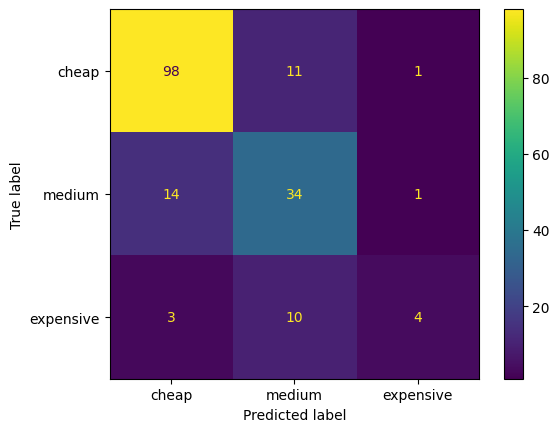

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cheap', 'medium', 'expensive'])
disp.plot()

In [ ]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

#### Precision

In [ ]:
precision = TP / (TP + FP)
print(precision * 100)

75.55555555555556


#### Recall

In [ ]:
recall = TP / (TP + FN)
print(recall * 100)

70.83333333333334


#### F1

In [ ]:
f1 = (2 * precision * recall) / (precision + recall)
print(f1 * 100)

73.11827956989248


#### Accuracy

In [ ]:
accuracy = (TP + TN) / (TP + FN + TN + FP)
print(accuracy * 100)

84.07643312101911


#### Specificity

In [ ]:
specificity = TN / (TN + FP)
print(specificity * 100)

89.90825688073394


## Deployment

In [ ]:
# Export df yang sebelum encoding
# df3 dipakai karena ini df yang setelah cleaning dan sebelum encoding
df3.to_csv("output.csv", index=False)

#Unsupervised

**Most Popular Film and Series**

Study Case

> Study Case


Sebuah bioskop atau tempat memutarkan film tentunya akan membutuhkan data untuk riwayat film dan series popular agar dapat memberikan informasi kepada customer


> Brief

Customer juga tentunya akan membutuhkan riwayat film dan series yang popular sehingga customer dapat menentukan film atau series yang ingin ditonton

##Library

In [ ]:
# Untuk data dan analisis
import pandas as pd

# Melakukan pehritungan 
import numpy as np
import math as m

# Membuat sebuah visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Link awal gdrive
link = "https://drive.google.com/file/d/1D9lHApdyL2Kn2u3dUOhH4loy4EW8T0N-/view?usp=share_link"

#Setelah Diubah
URL = "https://drive.google.com/uc?id=1D9lHApdyL2Kn2u3dUOhH4loy4EW8T0N-"

##Data Understanding

In [ ]:
#Melakukan pengambilan data set dan menyimpan di frame
df = pd.read_csv(URL)

In [ ]:
#Menampilkan 10 baris pertama
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
#Untuk Shape
df.shape

(8950, 18)

In [ ]:
#Untuk melihat tipe data, informasi dan banyaknya variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA


> Result
* Terlihat diatas jika dataset tidak memiliki nilai null




##Describe



> Column Describe/Attribute


* Cust_ID : id kostumer
* Balance : Jumlah saldo pada kartu kredit
* Balance_frequency : Frekuensi saldo
* Purchases : Pembelian
* Oneoff_Purchases : Salah satu pembelian
* Installments_Purchases :Pembelian 
* Cash_Advance : Pemasukan
* Purchases_Frequency : Frekuensi Pembelian
* Oneoff_Purchases_Frequency : Frekuensi Salah satu pembelian 
* Purchases_Installments_Frequency : Frekuensi install pembela
* Cash_Advance_Frequency : Frekuensi Pemasukan
* Cash_Advance_TRX:
* Purchases_TRX:
* Credit_limit: Limir kartu kredit
* Payments: Pembayaran
* Minimum_payments: Pembayaran minimum
* PRC_full_payments:
* Tenure: Masa jabatan
 




##Data Cleaning

### Drop unused column

In [ ]:
df = df.drop('CUST_ID', axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


###Handling Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
df.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [ ]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())



> Mencari data rata-rata yang kosong pada "Minimum Payments"



In [ ]:
# Untuk melihat apakah pada kolon Date ada yang kosong, jika tidak maka dilanjutkan, jika kosong maka akan di cleaning
# df[df.CUST_ID.isin([" ",np.nan])]



> Result
* Tidak terdapat data kosong sehingga bisa melanjutkan pada tahap berikutnya



###Handling Duplicate Data

In [ ]:
df[df.duplicated()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE




> Result 
* Tidak terdapat duplikasi data






###Handling Outlier

In [ ]:
def outlier(col):
    Q1 = df[col].quantile(0.25) # Mengetahui mana yang quartile 1
    Q3 = df[col].quantile(0.75) # Mengetahui mana yang quartile 3
    IQR = Q3 - Q1 # Simpangan Quartile (q3-q1)    
    return df[(df[col]> Q3 +1.5*IQR)  | (df[col]< Q1-1.5*IQR )]

In [ ]:
outlier("CASH_ADVANCE_TRX")

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12
36,7427.076941,1.000000,0.00,0.00,0.00,8873.375046,0.000000,0.000000,0.000000,0.727273,11,0,9000.0,1636.361601,1986.843608,0.000000,11
38,6269.418144,1.000000,204.00,204.00,0.00,2925.699862,0.083333,0.083333,0.000000,0.333333,12,2,9000.0,1237.111661,2049.408839,0.000000,12
41,784.889762,0.909091,1526.59,786.30,740.29,2188.419607,0.583333,0.416667,0.333333,0.250000,11,27,3000.0,1262.309666,363.142736,0.111111,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7
8868,380.839064,0.857143,0.00,0.00,0.00,703.941544,0.000000,0.000000,0.000000,0.428571,13,0,500.0,321.382010,123.667130,0.000000,7
8872,600.052391,1.000000,274.00,0.00,274.00,821.878829,1.000000,0.000000,0.875000,0.500000,13,8,1000.0,151.304337,245.340184,0.000000,8
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6


In [ ]:
outlier("PURCHASES_TRX")

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.000000,12
31,1162.273324,1.000000,1347.71,400.00,947.71,175.815755,1.000000,0.083333,1.000000,0.166667,2,45,6000.0,645.998299,256.848991,0.000000,12
48,229.867179,1.000000,2390.60,1402.93,987.67,0.000000,1.000000,0.666667,1.000000,0.000000,0,87,3300.0,2543.953559,175.657825,0.916667,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12
8707,78.448912,1.000000,1875.18,977.85,897.33,0.000000,1.000000,0.833333,0.916667,0.000000,0,78,1200.0,1656.503571,172.161277,1.000000,12
8737,2533.618119,0.909091,5633.83,2985.92,2647.91,2451.807788,0.916667,0.500000,0.750000,0.333333,16,82,9000.0,8176.953944,602.963244,0.000000,12
8847,224.692470,0.888889,1112.07,0.00,1112.07,0.000000,0.888889,0.000000,0.777778,0.000000,0,44,1500.0,900.366427,151.429715,0.000000,9


In [ ]:
outlier("TENURE")

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
16,2072.074354,0.875000,0.00,0.00,0.00,2784.274703,0.000000,0.000000,0.000000,0.250000,3,0,3000.0,391.974562,376.579631,0.00,8
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.00,11
36,7427.076941,1.000000,0.00,0.00,0.00,8873.375046,0.000000,0.000000,0.000000,0.727273,11,0,9000.0,1636.361601,1986.843608,0.00,11
46,474.447149,0.500000,109.74,0.00,109.74,1013.659552,0.375000,0.000000,0.250000,0.125000,1,3,1700.0,176.013005,147.199792,0.00,8
50,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


##Data Visualization and Analysis

Pertama-tama kita dapat melihat summary terhadap statisik dataframe yang ada

Summary ini berisi rata-rata, standar deviasi, nilai max dan niali min,
quartil 1, 2 (median) , dan 3 

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


###Univariate Analysis

<h3><b>Distribution</b></h3>

Pertama kita dapat melihat distribusi dan persebaran dari **Date**

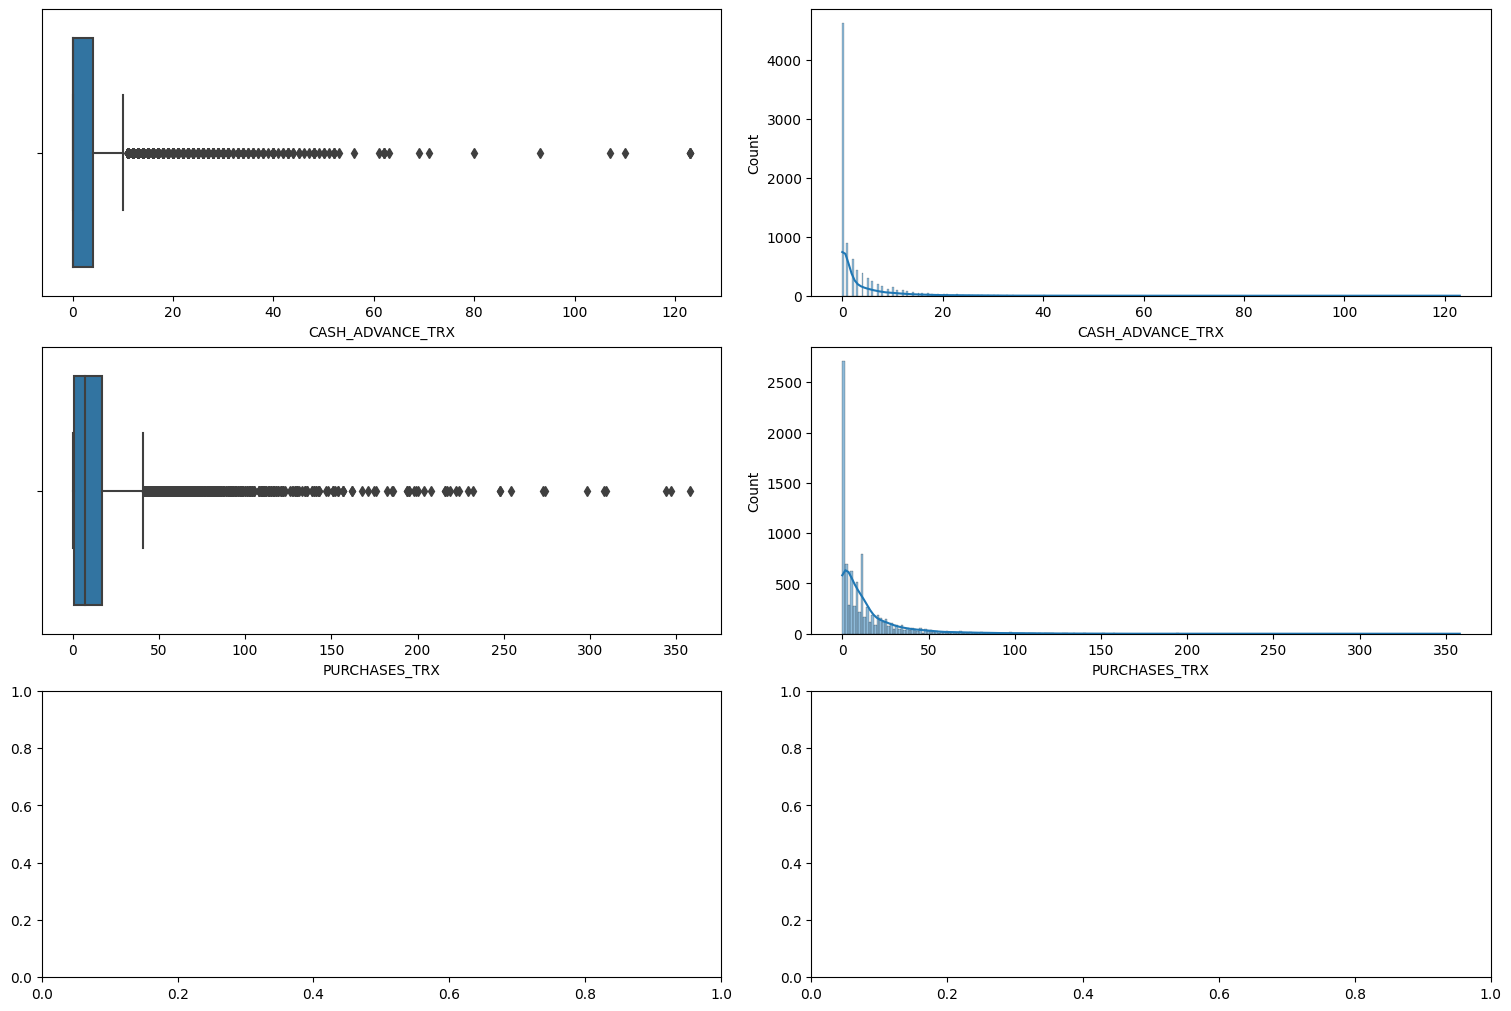

In [ ]:
cols = ["CASH_ADVANCE_TRX","PURCHASES_TRX"]
fig, axes = plt.subplots(3, 2, figsize=(15, 10),constrained_layout = True)

for ax,col in zip(axes,cols):
    sns.boxplot(data=df,x=col,ax=ax[0])
    sns.histplot(df,x=col,ax=ax[1],kde=True)

### **Bivariate Analysis**

Bagian ini menampilkan relasi antar dua variabel pada dataset

In [ ]:
df.groupby("TENURE").describe()

BALANCE                                                               \
         count         mean          std       min         25%          50%   
TENURE                                                                        
6        204.0  1095.890702  1723.109400  0.271854   51.643225   346.103915   
7        190.0  1003.800362  1268.620838  0.000000   87.481974   643.134871   
8        196.0  1127.963470  1723.933049  0.000000   84.854968   659.017854   
9        175.0  1098.752149  1515.354663  0.000000   70.753364   413.331088   
10       236.0  1251.955773  1638.359492  0.000000   74.640990   684.878066   
11       365.0  1641.770893  1987.618967  0.000000  185.984965  1108.316745   
12      7584.0  1619.158166  2135.816393  0.000000  137.898129   913.871488   

                                  BALANCE_FREQUENCY            ...  \
                75%           max             count      mean  ...   
TENURE                                                         ...   
6       1320.775071   9601.071318             204.0  0.791667  ...   
7       1291.306649   8220.740014             190.0  0.803759  ...   
8       1388.823017  15258.225900             196.0  0.783163  ...   
9       1453.352388   7919.563494             175.0  0.784127  ...   
10      1706.033280   9559.783145             236.0  0.792373  ...   
11      2149.205166  13318.659120             365.0  0.870486  ...   
12      2135.375949  19043.138560            7584.0  0.888965  ...   

       MINIMUM_PAYMENTS               PRC_FULL_PAYMENT                      \
                    75%           max            count      mean       std   
TENURE                                                                       
6            444.241353   7256.951816            204.0  0.212500  0.361390   
7            553.489536   7243.733403            190.0  0.135363  0.274437   
8            598.156122   3905.740148            196.0  0.154094  0.302288   
9            697.746278  10057.561920            175.0  0.169778  0.311532   
10           642.439872   3422.988223            236.0  0.169396  0.321573   
11           864.206542  26378.907820            365.0  0.118375  0.251633   
12           864.206542  76406.207520           7584.0  0.153426  0.290858   

                                      
        min  25%  50%       75%  max  
TENURE                                
6       0.0  0.0  0.0  0.270833  1.0  
7       0.0  0.0  0.0  0.166667  1.0  
8       0.0  0.0  0.0  0.148810  1.0  
9       0.0  0.0  0.0  0.200000  1.0  
10      0.0  0.0  0.0  0.125000  1.0  
11      0.0  0.0  0.0  0.090909  1.0  
12      0.0  0.0  0.0  0.142857  1.0  

[7 rows x 128 columns]

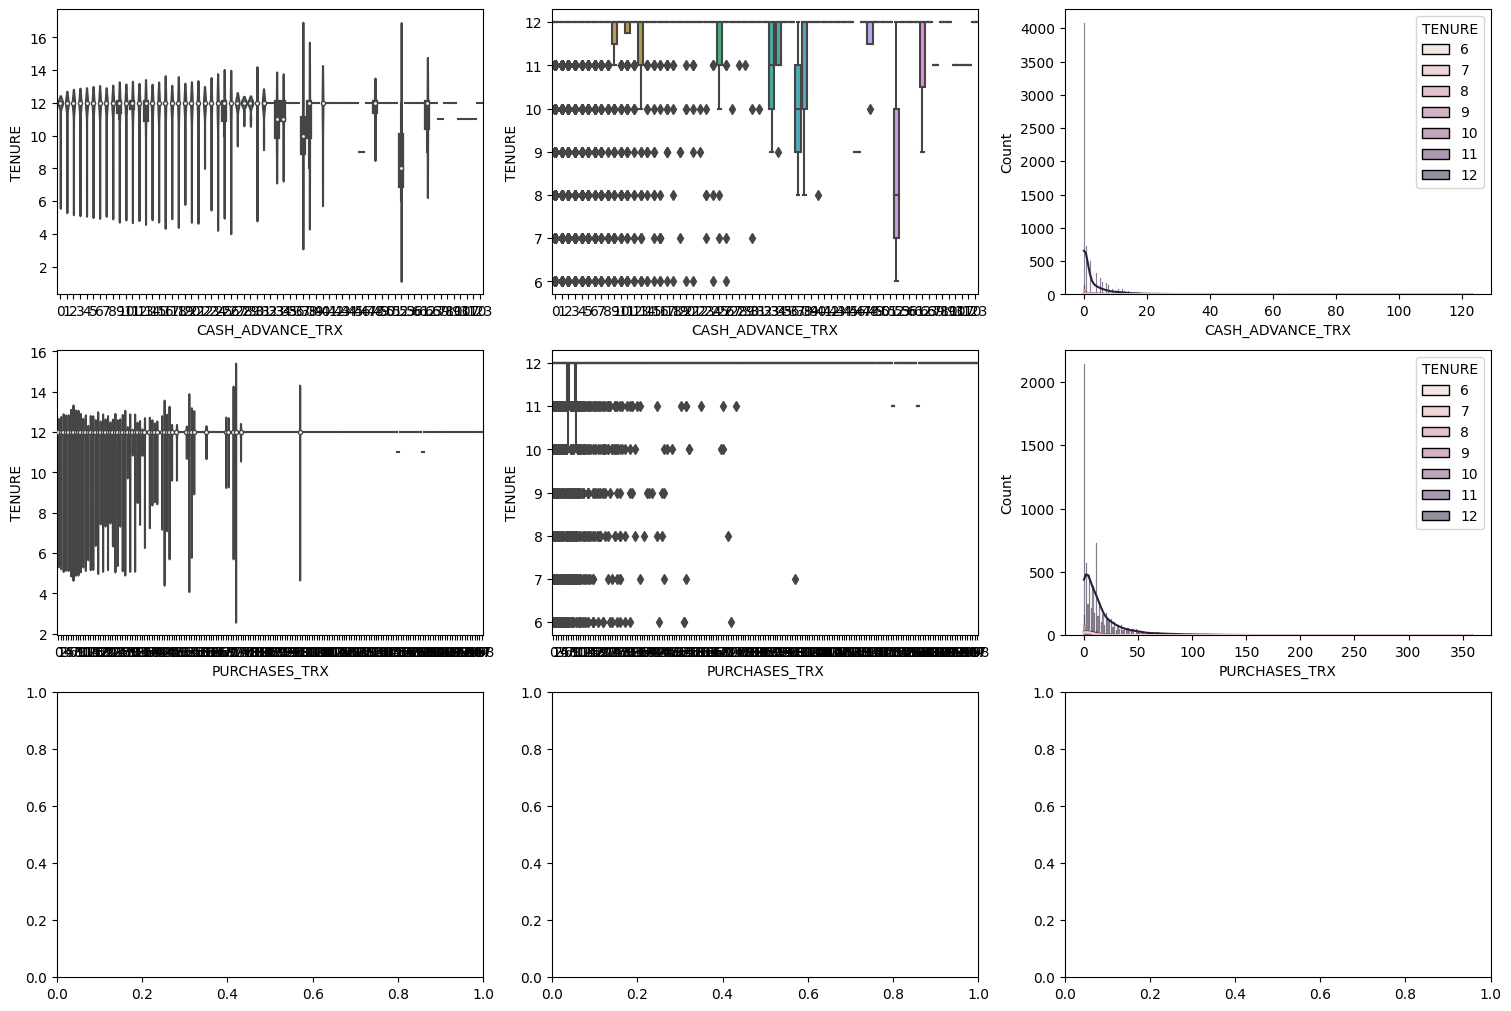

In [ ]:
cols = ["CASH_ADVANCE_TRX","PURCHASES_TRX"]
fig, axes = plt.subplots(3, 3, figsize=(15, 10),constrained_layout = True)

for ax,col in zip(axes,cols):
    sns.boxplot(data=df,x=col,y="TENURE",ax=ax[1])
    sns.violinplot(data=df,x=col,y="TENURE",ax=ax[0])
    sns.histplot(df,x=col,ax=ax[2],kde=True,hue="TENURE",shrink=.8)

### **Multivariate Analysi**s

Bagian ini menampilkan korelasi lebih dari satu variabel

In [ ]:
df_corr = pd.get_dummies(df).corr()

In [ ]:
px.imshow(df_corr)

In [ ]:
fig = px.scatter_matrix(df,dimensions=cols,color="TENURE")
fig.update_layout(dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig.show()

# **Modelling**

## Pre Processing

In [ ]:
# Untuk Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering,KMeans,AffinityPropagation,Birch

# Untuk scalling dan normalisasi
from sklearn.preprocessing import StandardScaler

# Metric Pengukuran
# sumber : https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
# PreProcessing
# Encoding DataTraining
X_train = pd.get_dummies(df,drop_first=True)

Dibuatlah sebuah class untuk memudahkan proses visualiasi,normalisasi, dan pengukuran cluster pada tiap algoritma cluster yang berbeda

In [ ]:
# Creating a class to handle clustering
class Cluster:
    
    # Pada constructor terjadi beberapa proses
    # 1. Membuat normalisasi data
    
    def __init__(self,train):
        self.train = train
        self.scaled = StandardScaler().fit_transform(self.train)
        self.clusters = None
        self.name = None
        self._label = None

    # Method apply adalah fungsi kedua yang harus dijalankan
    # Method apply akan menerima argumen tambahan sebagai argumen untuk 
    # algoritma cluster yang akan digunakan
    def apply(self,cluster_algo,**kwargs):
        agg_cluster = cluster_algo(**kwargs)


        self.clusters = agg_cluster.fit(self.scaled) #Set Value
        self._label = self.clusters.labels_ #Set value

        # Mengambil nama algoritma clusternya
        self.name = type(self.clusters).__name__

        return self
    
    # Df untuk membuat dataframe
    def df(self,normalized=False):

        if normalized:
            X = pd.DataFrame(self.scaled,columns=self.train.columns)
        else:
            X = self.train.copy(deep=True)
        
        X["Cluster"] = self._label
        X["Cluster"] = X['Cluster'].astype(object)

        return X
    # Untuk Mendapatkan cluster ke N
    def get_cluster(self,n,normalized=False):
        df = self.df(normalized)
        
        return df[df["Cluster"] == n]

    # Plot untuk membuat scatterplot 
    def plot(self,X,Y,normalized=False):
        return px.scatter(self.df(normalized), x=X, y=Y, color="Cluster")

    # Plot 3d untuk membuat scatterplot 3d
    def plot_3d(self,X,Y,Z,normalized=False):
        return px.scatter_3d(self.df(normalized), x=X, y=Y,z=Z, color="Cluster")

    # menggunakan decorator property untuk mengonversi method menjadi property
    @property
    def metric(self): #Method ini berfungsi untuk mengambil hasil pengukuran berdasrkan metric ...
        label = self._label
        # Ini metric yang digunakan 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'
        
        return [silhouette_score(self.scaled,label),davies_bouldin_score(self.scaled,label),calinski_harabasz_score(self.scaled,label)]

**Menentukan banyak cluster maksimal.**

Salah satu cara untuk menentukan banyak cluster maksimal adalah dengan
menggunakan pengukuran SSE  Jarak kuadrat antar centroid dari setiap cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

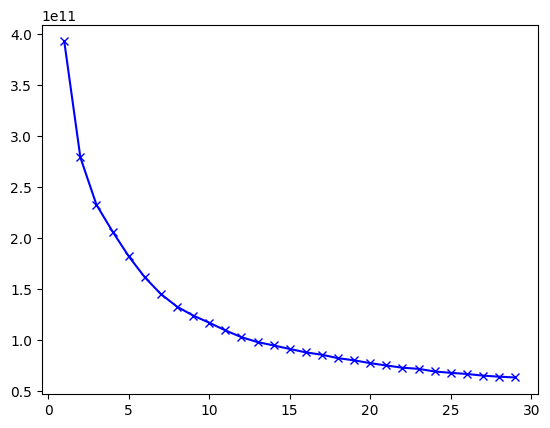

In [ ]:
sse = [] #Daftar SSE
K = range(1,30) #Banyak Cluster hingga 30
# Perulangan hingga 30 Cluster
for k in K:
    kmeans = KMeans(n_clusters= k,random_state=42).fit(X_train)
    #Mendapatkan SSE dan append ke list sse
    sse.append(kmeans.inertia_)

# Membuat plot K terhadap SSE
plt.plot(K,sse, "bx-")

Berdasarkan Plot diatas dan *elbow rule*, ** 5 ** ditentukan sebagai banyak cluster yang akan digunakan

## Modelling

### K-Means

In [ ]:
# Pertama-tama kita perlu menerapkan algoritma KMeans kedalam kelas Cluster
kmeans = Cluster(X_train).apply(KMeans,n_clusters=5,random_state=42) #n_cluster adalah banyak clusternya

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Berikut ini adalah hasil cluster dari K-Means

In [ ]:
# Untuk menampilkan dataframe 
kmeans.df().head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [ ]:
# Menampilkan plot berdasarkan dataframe dan 3 variabel x,y,z
kmeans.plot_3d("CASH_ADVANCE_TRX","PURCHASES_TRX","TENURE")

### AgglomerativeClustering

In [ ]:
# Pertama-tama kita perlu menerapkan algoritma KMeans kedalam kelas Cluster
Agg = Cluster(X_train).apply(AgglomerativeClustering,n_clusters=5)

In [ ]:
# Untuk menampilkan hasil cluster dalam bentuk dataframe 
Agg.df().head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
# Plot cluster yang diperoleh
Agg.plot_3d("CASH_ADVANCE_TRX","PURCHASES_TRX","TENURE")

### Birch

In [ ]:
# Pertama-tama kita perlu menerapkan algoritma KMeans kedalam kelas Cluster
br = Cluster(X_train).apply(Birch,n_clusters=5)

In [ ]:
# Menampilkan hasil cluster dalam bentuk dataframe
br.df().head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [ ]:
# Scatter plot cluster tersebut
br.plot_3d("CASH_ADVANCE_TRX","PURCHASES_TRX","TENURE",True)

## Metric Pengukuran

Untuk mengukur seperapa efektif algoritma-algoritma diatas mengclusterkan dataset yang ada, dilakukanlah beberapa pengukuran.

Metric yang digunakan pada pengukuran ini adalah sebagai berikut 

**A. Silhouette Coefficient:**

Pengukuran metrik ini dilakukan dengan menghitung rata-rata jarak didalam cluster dan jarak dengan anggota cluster terdekat. Nilainya bervariasi antara -1 hingga 1

1 : Artinya clusternya saling terpisah dan tiap cluster dapat terlihat perbedaannya

0: Tiap cluster tidak jelas perbedaannya dan tidak signifikan

1 : Clustering tidak berjalan dengan baik. 
<br>
<br>
**B. calinski harabasz score**

 Pengukuran metrik ini dilakukan dengan mengukur rasio jarak antara titik dengan pusat clusternya serta jarak antara centroid cluster dengan titik utama dari keseluruhan data. 

Semakin tinggi nilai CH (Calinski Harabasz) maka semakin baik pula cluster tersebut

<br>
<br>

**C. davies bouldin score**


Pengukuran metrik ini dilakukan dengan cara mengukur rata-rata kesamaan dari setiap cluster dengan cluster yang memiliki kesamaan terhadap cluster tersebut. Kesamaan tersebut diukur dari raio antara jarak pada dalam cluster dengan jarak terhadap cluster terdekat.

Semakin kecil nilai pengukuran ini maka semakin baik pula cluster atau agloritma yang digunakan.

In [ ]:
# Mengumpulkan Algorita Apa Saca yang dipakai
algos = [Agg,kmeans,br]

# Untuk menampung hasil metrik (bentuk list dari list metrics ini adalah nested list)
metrics = [i.metric for i in algos]

# Nama dari setiap algo menjadi indexnya
index = [i.name for i in algos]

# Penamaan Kolmnya
df_metric = pd.DataFrame(metrics,index=index,columns=['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])


Sehingga diperoleh hasil metrik sebagai berikut

In [ ]:
df_metric

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
AgglomerativeClustering,0.158069,1.588442,1161.990892
KMeans,0.193169,1.549390,1482.159003
Birch,0.149559,1.596233,1159.906763


Berdasarkan deskripsi metrik pengukuran di atas. Dapat ditentukan algoritma terbaik yang memenuhi ketentuan adalah sebagai berikut

In [ ]:
# https://stackoverflow.com/questions/28075699/coloring-cells-in-pandas
best = [
    df_metric.iloc[:,0].max() # Makin Tinggi Nilai silhoutte makin bagus
    ,df_metric.iloc[:,1].max(), # Makin Tinggi Nilai CH makin bagus
    df_metric.iloc[:,2].min()
    ] # Makin rendah nilai David Bouldin makin bagus

#Ini untuk conditional formatting
def _color_green(val):
    if val in best:
        return 'background-color: green; color:white'
    return 'backround-color:white'

In [ ]:
# Menampilkan tabel setelah dilakukan contional formatting
df_metric.style.applymap(_color_green)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
AgglomerativeClustering,0.158069,1.588442,1161.990892
KMeans,0.193169,1.549390,1482.159003
Birch,0.149559,1.596233,1159.906763


Berdasarkan pengukuran diatas ditemukan bahwa **Birch** merupakan algoritma yang cukup ideal untuk pengukuran ini. Hal tersebut terlihat dari nilai davies bouldin score yang tinggi serta nilai *silouette* dan *calinski harabasz* score yang menempati posisi kedua terbaik

## Analisis Cluster

In [ ]:
# Pertama kita perlu membuat fungsi plot untuk plotting cluster
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(2,4,figsize=(30,7),constrained_layout = True)
    sns.countplot(data=cluster_df,x="CREDIT_LIMIT",ax=ax[1][3])
    for i,col in enumerate(cols):
        sns.histplot(data=cluster_df,x=col,ax=ax[0][i],kde=True)
        sns.boxplot(data=cluster_df,x=col,ax=ax[1][i])

In [ ]:
# Kolom yang berisi numerikkal
cols = ["BALANCE","BALANCE_FREQUENCY","PURCHASES"]

In [ ]:
# Membuat List Tiap Cluster yang ada
cluster1 = br.get_cluster(0)
cluster2 = br.get_cluster(1)
cluster3 = br.get_cluster(2)
cluster4 = br.get_cluster(3)
cluster5 = br.get_cluster(4)

### Cluster 1

In [ ]:
# Menampilkan deskripsi statistik dari cluster 1
cluster1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000
mean,4334.118666,0.980367,532.068297,340.950724,191.191893,3770.237359,0.266222,0.133273,0.173672,0.413513,12.247076,7.860380,6980.412679,3207.768353,2614.004922,0.031845,11.819444
std,2769.741008,0.066395,1029.121440,774.686590,498.258246,3668.522176,0.352989,0.233543,0.311808,0.243097,12.413873,15.657507,3964.531196,3867.622809,5240.192299,0.095592,0.625245
min,78.114579,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000
25%,1988.640085,1.000000,0.000000,0.000000,0.000000,1563.010806,0.000000,0.000000,0.000000,0.250000,5.000000,0.000000,4000.000000,1088.247755,737.170646,0.000000,12.000000
50%,4031.926360,1.000000,47.925000,0.000000,0.000000,2999.834801,0.083333,0.000000,0.000000,0.416667,9.000000,1.000000,6500.000000,1843.098197,1343.254744,0.000000,12.000000
75%,5942.056297,1.000000,574.335000,300.650000,114.022500,4817.195177,0.500000,0.166667,0.250000,0.583333,16.000000,9.000000,9500.000000,3726.416575,2263.517900,0.000000,12.000000
max,16304.889250,1.000000,7739.480000,6678.260000,7739.480000,47137.211760,1.000000,1.000000,1.000000,1.090909,123.000000,162.000000,21500.000000,39048.597620,76406.207520,1.000000,12.000000


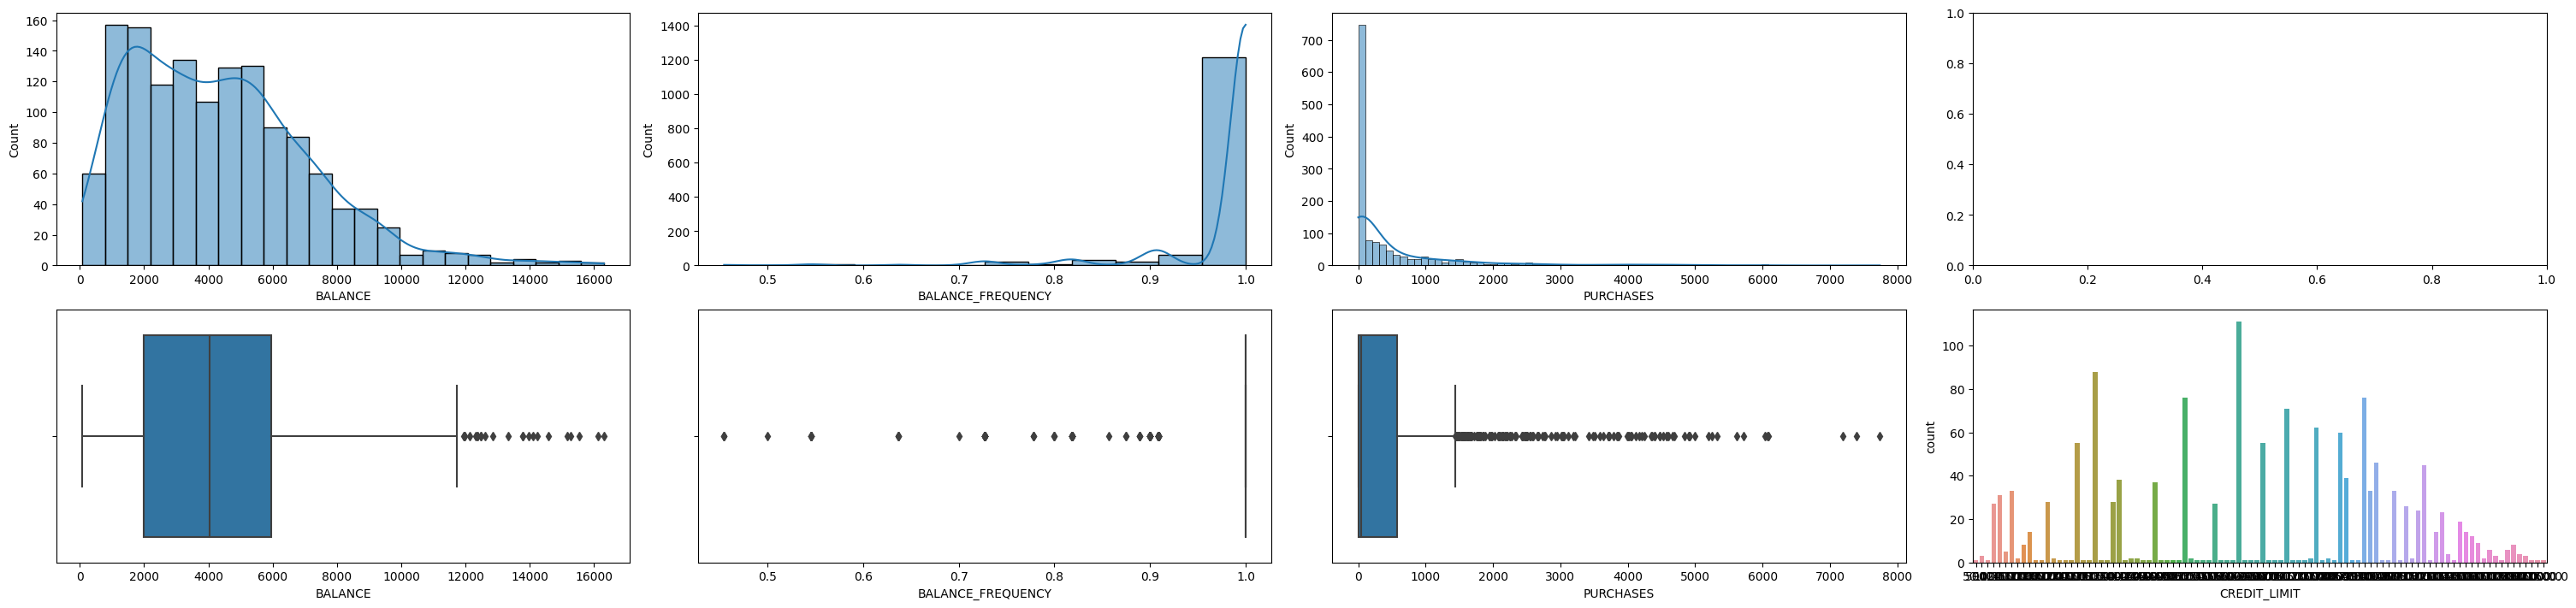

In [ ]:
# Menampilkan distribusi dari cluster1
plot_cluster(cluster1)

### Cluster 2

In [ ]:
# Menampilkan deskripsi statistik dari cluster 2
cluster2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000,2725.000000
mean,955.559109,0.966137,1392.094745,735.007006,657.302239,268.421981,0.875113,0.358328,0.671011,0.051685,1.053211,23.664220,4316.261051,1561.377036,530.568030,0.288617,11.958899
std,1154.466367,0.097658,1178.635322,974.840763,675.450630,722.048403,0.178171,0.362412,0.363018,0.112610,2.601485,16.491396,3117.460406,1473.231102,722.923591,0.371357,0.255193
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,3.197940,0.000000,6.000000
25%,111.539712,1.000000,505.480000,0.000000,188.180000,0.000000,0.818182,0.000000,0.416667,0.000000,0.000000,12.000000,1900.000000,564.329726,170.242711,0.000000,12.000000
50%,449.456201,1.000000,1023.760000,358.000000,457.090000,0.000000,1.000000,0.250000,0.833333,0.000000,0.000000,19.000000,3500.000000,1099.568918,208.701639,0.083333,12.000000
75%,1417.474456,1.000000,1945.800000,1099.720000,922.740000,0.000000,1.000000,0.666667,1.000000,0.000000,0.000000,30.000000,6000.000000,2029.208283,622.038869,0.600000,12.000000
max,6245.256644,1.000000,8751.490000,6206.990000,4538.840000,7663.906258,1.000000,1.000000,1.000000,0.750000,23.000000,143.000000,25000.000000,12020.180090,7960.080674,1.000000,12.000000


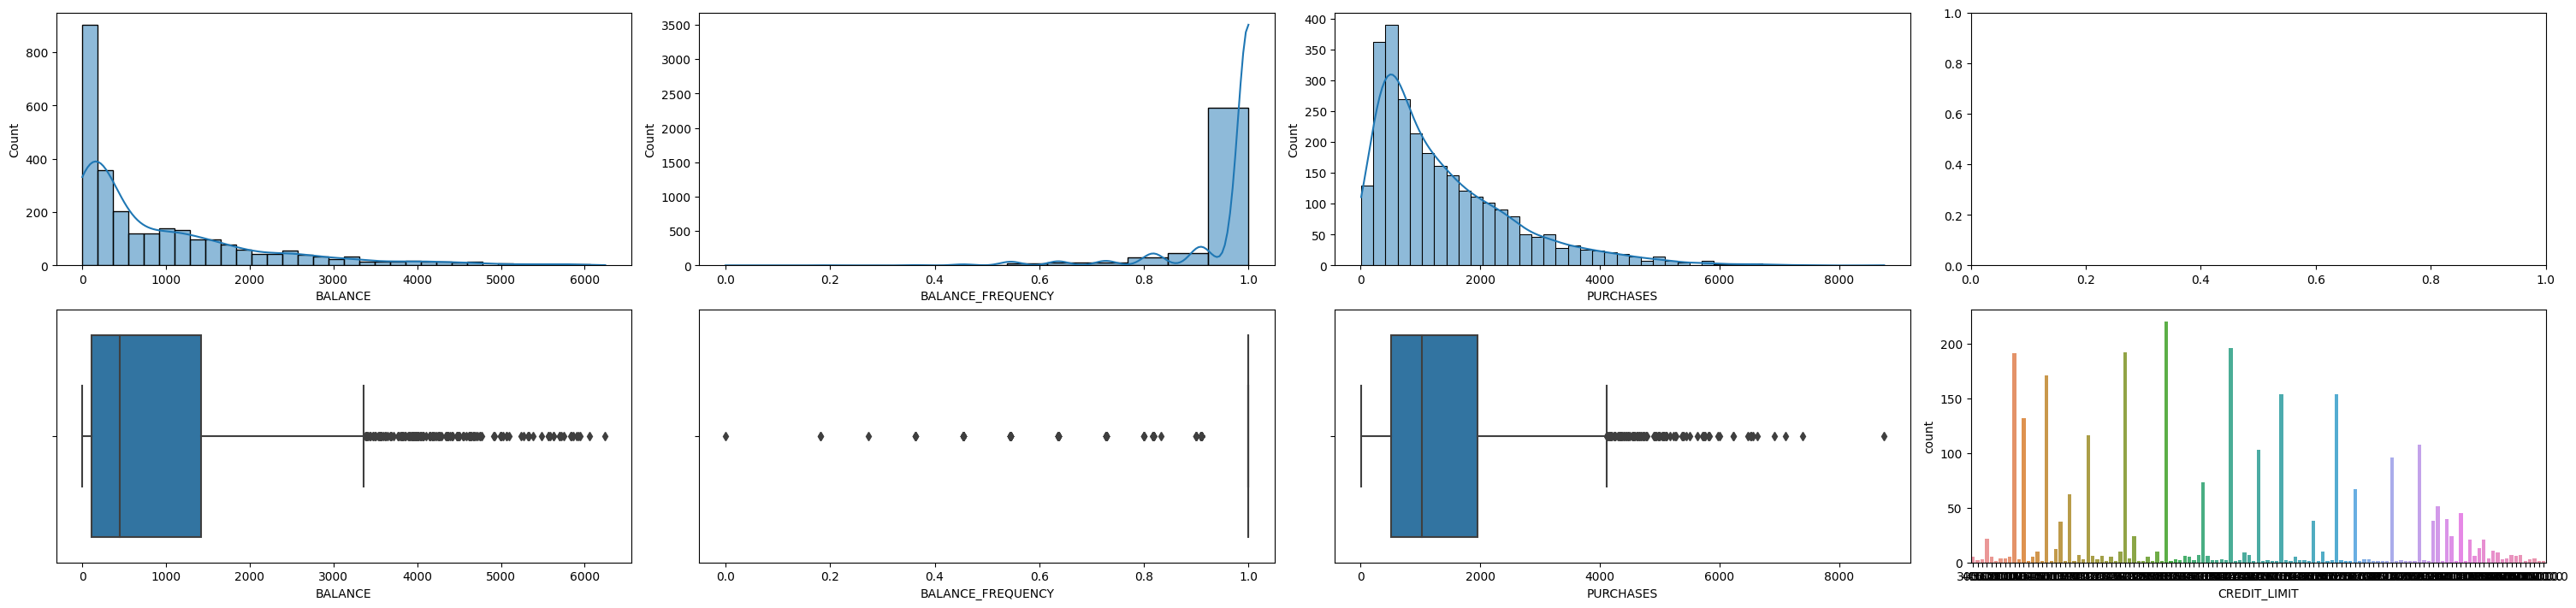

In [ ]:
# Menampilkan deskripsi statistik dari cluster 2
plot_cluster(cluster2)

### Cluster 3

In [ ]:
# Menampilkan deskripsi statistik dari cluster 3
cluster3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,887.056432,0.780996,342.337723,205.863646,136.788856,593.096381,0.281471,0.083047,0.195806,0.107014,1.978197,4.623511,3397.180641,962.702665,450.804371,0.106037,11.112160
std,1068.597656,0.294821,565.539938,468.054536,282.848630,1117.067986,0.309291,0.140579,0.289752,0.153388,3.269961,6.710187,2928.638989,1873.867518,582.943184,0.238856,1.763248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000
25%,53.697916,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,254.277454,135.799005,0.000000,11.000000
50%,516.492760,1.000000,133.310000,0.000000,0.000000,19.351230,0.166667,0.000000,0.000000,0.083333,1.000000,2.000000,2500.000000,510.211233,262.139361,0.000000,12.000000
75%,1354.161432,1.000000,441.000000,190.600000,167.220000,830.921998,0.500000,0.090909,0.333333,0.166667,3.000000,7.000000,4200.000000,999.711434,586.693702,0.083333,12.000000
max,13763.473580,1.000000,9670.840000,6701.080000,4460.780000,10590.411130,1.000000,1.000000,1.000000,1.500000,26.000000,110.000000,23000.000000,40627.595240,7256.951816,1.000000,12.000000


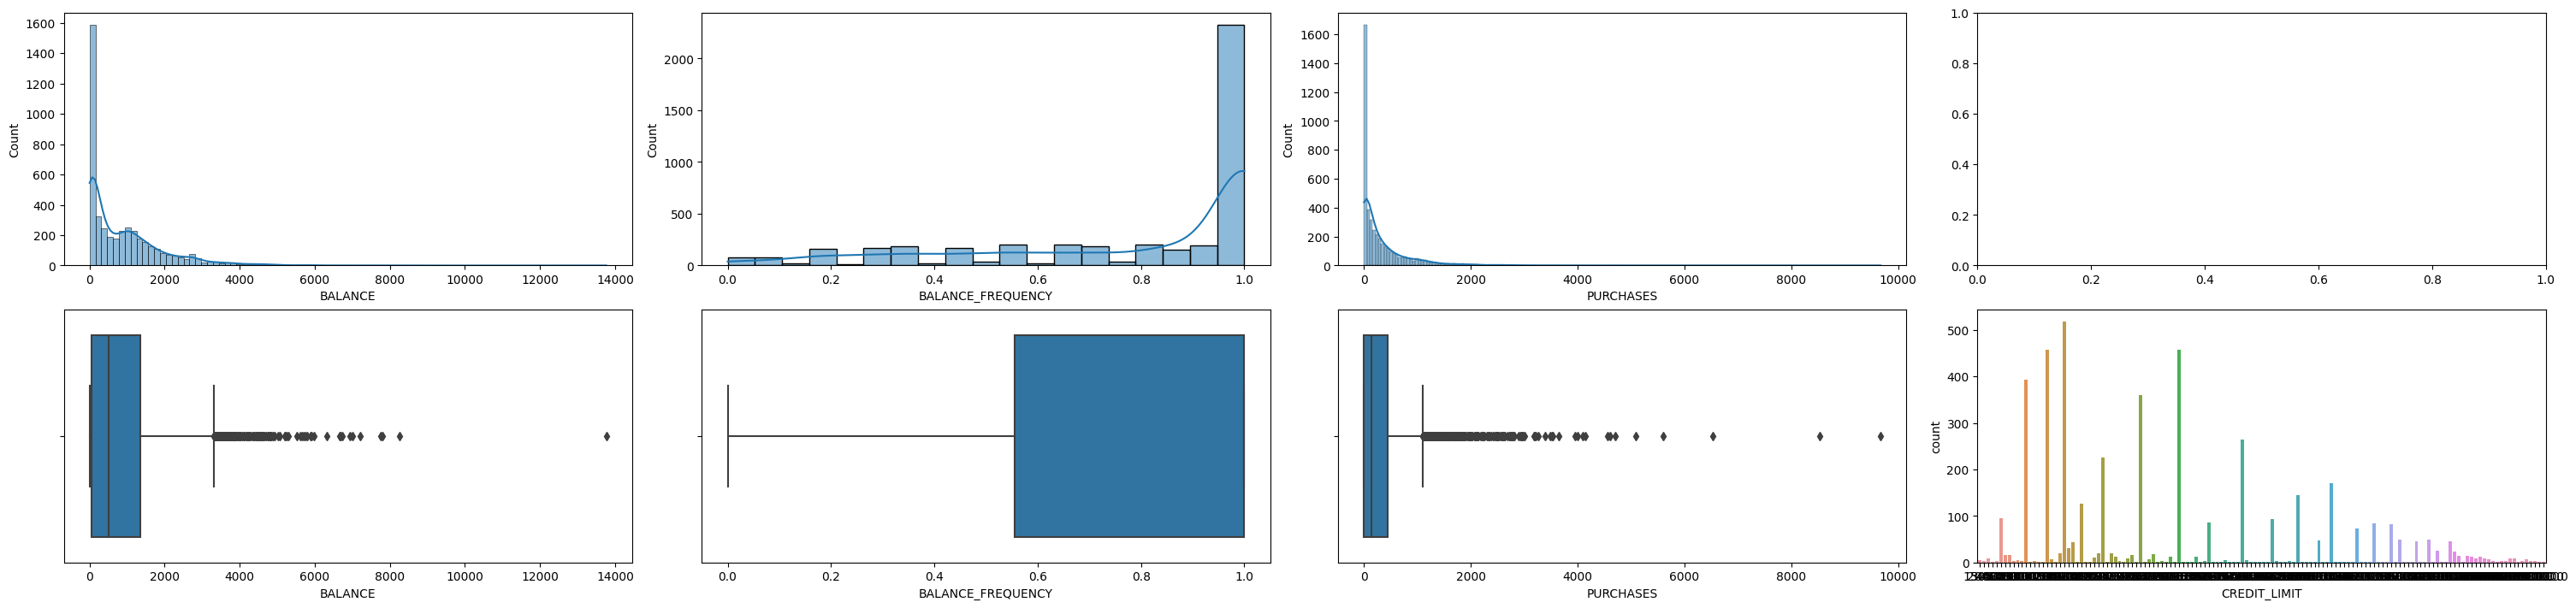

In [ ]:
# Menampilkan distribusi dari cluster3
plot_cluster(cluster3)

### Cluster 4

In [ ]:
# Menampilkan deskripsi statistik dari cluster 4
cluster4.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,4812.382778,0.956126,27505.339565,22417.452174,5087.887391,1617.786145,0.905072,0.846377,0.708696,0.061594,2.608696,124.130435,16000.000000,28138.984873,2599.090939,0.533432,11.913043
std,3266.584495,0.154877,8703.420229,8419.217951,4604.709024,4982.502225,0.227937,0.245924,0.377186,0.168957,8.111379,87.703687,5680.909018,9254.820734,3882.474304,0.399647,0.417029
min,1268.809031,0.272727,12551.950000,10901.240000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,3.000000,7500.000000,13002.303930,410.800069,0.000000,10.000000
25%,2708.796498,1.000000,21952.190000,16329.990000,767.865000,0.000000,1.000000,0.666667,0.500000,0.000000,0.000000,71.000000,12000.000000,22446.439760,566.144486,0.125000,12.000000
50%,3391.702180,1.000000,26402.390000,21802.600000,4732.290000,0.000000,1.000000,1.000000,0.916667,0.000000,0.000000,101.000000,17000.000000,26652.344320,1149.747342,0.583333,12.000000
75%,6170.383031,1.000000,31919.565000,25818.545000,7345.830000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,148.500000,18000.000000,32846.573435,2606.028806,0.958333,12.000000
max,13479.288210,1.000000,49039.570000,40761.250000,15497.190000,19513.474830,1.000000,1.000000,1.000000,0.666667,35.000000,358.000000,30000.000000,50721.483360,15914.484620,1.000000,12.000000


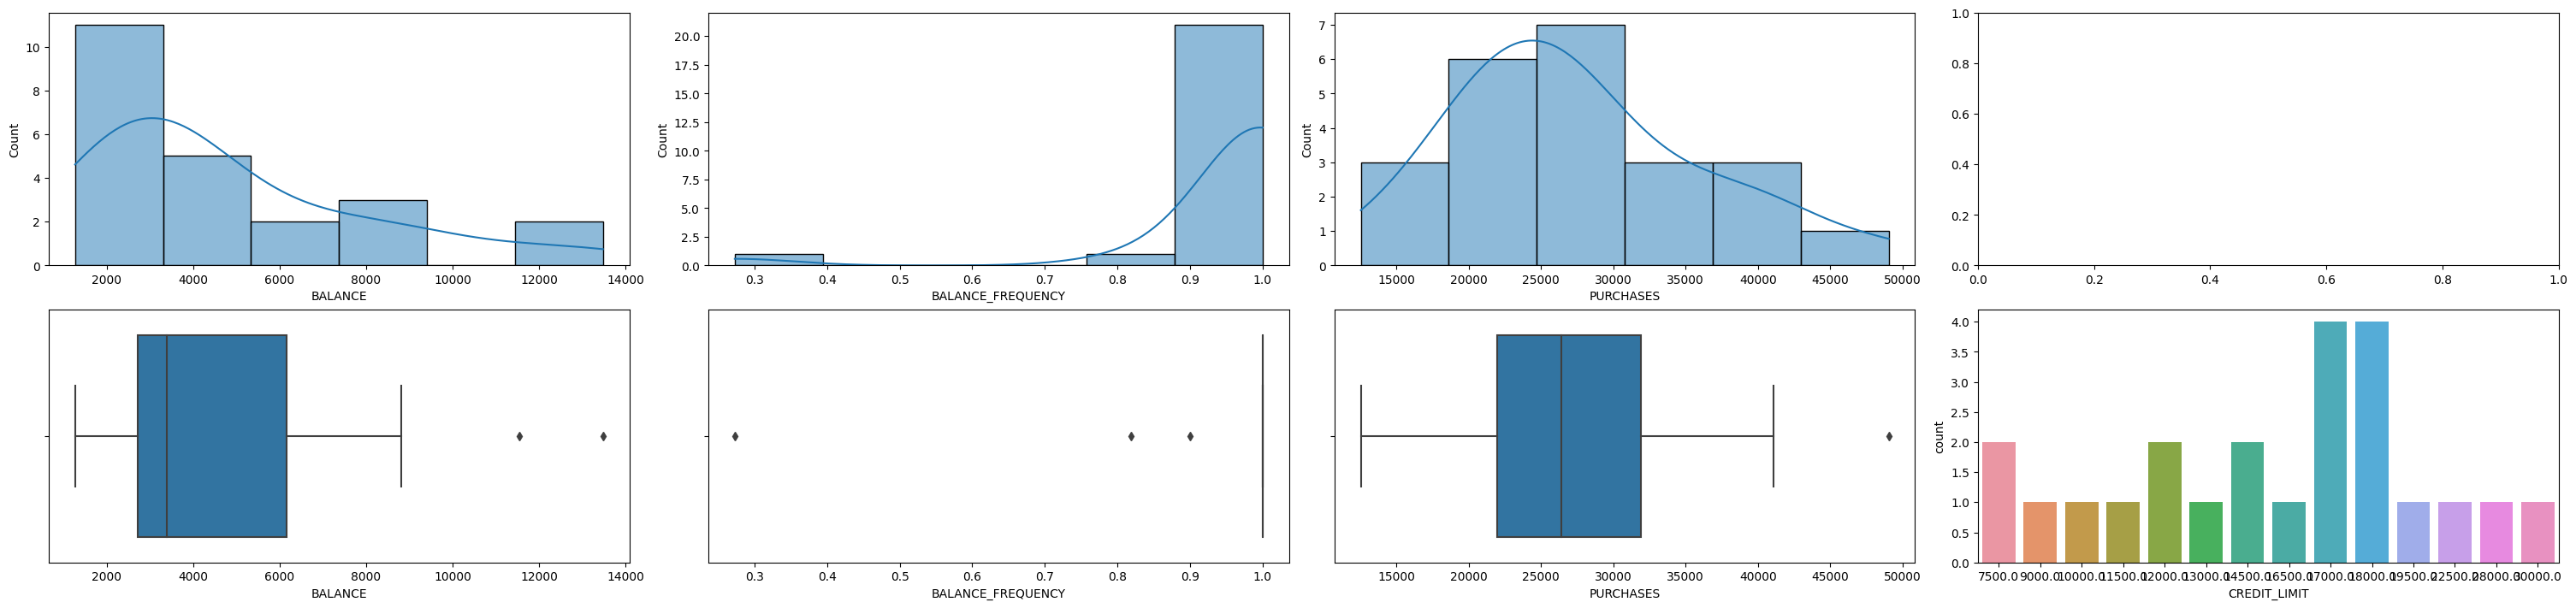

In [ ]:
# Menampilkan distribusi dari cluster 4
plot_cluster(cluster4)

### Cluster 5

In [ ]:
# Menampilkan deskripsi statistik dari cluster 5
cluster5.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,3667.215404,0.989776,5978.369636,3640.288390,2339.639688,508.745380,0.952420,0.686478,0.800476,0.066210,1.537662,85.688312,8914.935065,5034.797760,1681.777145,0.160187,11.976623
std,3167.181900,0.045260,3303.327919,2964.551876,2506.849694,1304.638469,0.123126,0.318718,0.309742,0.138140,4.108459,54.339610,4328.835794,3684.026289,2407.084552,0.309802,0.182500
min,38.792757,0.636364,451.010000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,5.000000,1000.000000,0.000000,85.993720,0.000000,10.000000
25%,1094.300448,1.000000,3507.350000,1516.300000,768.170000,0.000000,1.000000,0.500000,0.750000,0.000000,0.000000,50.000000,6000.000000,2139.278062,314.038049,0.000000,12.000000
50%,2882.954391,1.000000,5288.280000,2825.560000,1689.160000,0.000000,1.000000,0.750000,1.000000,0.000000,0.000000,76.000000,8500.000000,3984.428930,904.850068,0.000000,12.000000
75%,5248.392421,1.000000,7823.740000,5430.680000,2975.210000,225.473003,1.000000,1.000000,1.000000,0.083333,1.000000,105.000000,11500.000000,6967.667428,1830.532435,0.083333,12.000000
max,19043.138560,1.000000,22500.000000,14215.000000,22500.000000,15133.532130,1.000000,1.000000,1.000000,1.000000,48.000000,347.000000,30000.000000,23018.575830,18621.013310,1.000000,12.000000


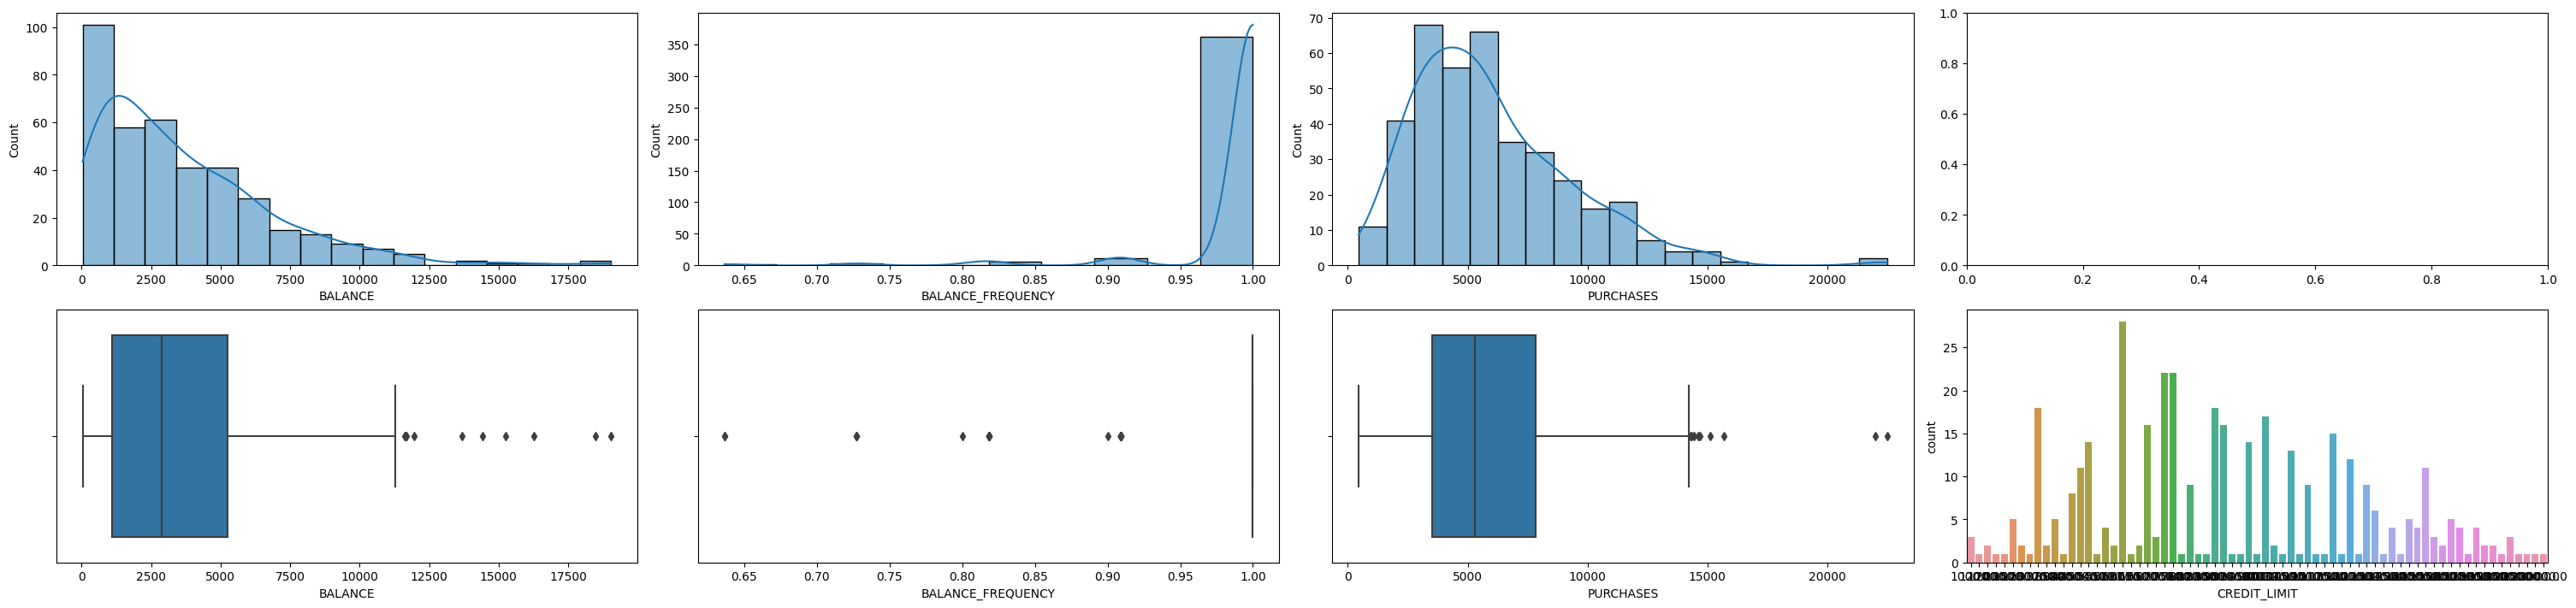

In [ ]:
# Menampilkan distribusi dari cluster 4
plot_cluster(cluster5)

# **Kesimpulan**

1.  Model **Birch** memiliki performa yang lebih baik, bila dibandingkan dengan AlgomerativeClustering dan K-Means
2.  Berdasarkan *elbow-rule* 5 cluster merupakan jumlah cluster optimal

3. Tiap cluster memiliki deskripsi sebagai berikut : 


In [ ]:
# TODO : DESKRIPSI DARI TIAP CLUSTER
br.plot_3d(cols[0],cols[1],cols[2])

# Deployment

In [ ]:
# Export df yang sebelum encoding
# df3 dipakai karena ini df yang setelah cleaning dan sebelum encoding
df.to_csv("output.csv", index=False)